In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os


In [2]:
#cargar datos

def load_data():
    df = pd.read_csv("../files/input/shipping-data.csv",sep=',')

    # Crear el directorio "plots" dentro de "files" si no existe
    output_dir = "../files/input/docs"
    os.makedirs(output_dir, exist_ok=True)


    return df

#load_data().head()   #-verificar que leyera la data

In [3]:
#Funcion que crea la grafica

def create_visual_for_shipping_per_werehouse(df):
    df= df.copy()
    plt.figure()
    counts = df.Warehouse_block.value_counts()
    counts.plot.bar(
        title="Shipping per Warehouse",
        xlabel="Warehouse block",
        ylabel="Record Count",
        color="tab:blue",
        fontsize=8,
    )
    plt.gca().spines["top"].set_visible(False)    #spines son los bordes que se eliminan de la grafica
    plt.gca().spines["right"].set_visible(False)

    # Guardar la figura en la ruta correcta
    output_dir = "../files/input/docs"
    output_path = os.path.join(output_dir, "shipping_per_warehouse.png")
    plt.savefig(output_path)
    plt.show()
   

#df = load_data()
#create_visual_for_shipping_per_werehouse(df)



In [4]:
#Visual for Mode of Shipment

def create_visual_for_mode_of_shipment(df):
    df = df.copy()
    plt.figure()
    counts = df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title="Mode of Shipment",
        wedgeprops=dict(width=0.35),
        ylabel="",
        colors=["tab:blue","tab:orange","tab:green"],
    )
    # Guardar la figura en la ruta correcta
    output_dir = "../files/input/docs"
    output_path = os.path.join(output_dir, "mode_of_shipment.png")
    plt.savefig(output_path)
    plt.show()

    
#df = load_data()
#create_visual_for_mode_of_shipment(df)

In [5]:
# Grafico Promedio de la calificacion de los Usuarios

def create_visual_for_average_Customer_rating(df):
    df = df.copy()
    plt.figure()
    df=(
    df[["Mode_of_Shipment","Customer_rating"]]
    .groupby("Mode_of_Shipment")
    .describe()
    )
    df.columns = df.columns.droplevel()
    df=df[["mean","min","max"]]
    plt.barh(
        y=df.index.values,
        width=df["max"].values - 1,
        left=df["min"].values,
        height=0.9,
        color="lightgray",
        alpha=0.8,
    )
    colors =[
        "tab:green" if value >= 3.0 else "tab:orange" for value in df["mean"].values

    ]

    plt.barh(
        y=df.index.values,
        width=df["mean"].values - 1,
        left=df["min"].values,
        height=0.5,
        color=colors,
        alpha=1.0,

    )
    plt.title("Average Customer Rating")
    plt.gca().spines["left"].set_color("gray")    #spines son los bordes que se eliminan de la grafica
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["bottom"].set_color("gray") 

    # Guardar la figura en la ruta correcta
    output_dir = "../files/input/docs"
    output_path = os.path.join(output_dir, "average_customer_rating.png")
    plt.savefig(output_path)
    plt.show()

#df = load_data()
#create_visual_for_average_Customer_rating(df)


    


In [6]:
# visual for weight Distribution

def create_visual_for_weight_distribution(df):
    df = df.copy()
    plt.figure()
    df.Weight_in_gms.plot.hist(
        title="Shipped Weight Distribution",
        color="tab:orange",
        edgecolor="white", # borde blanco que mejora la visualizacion de la grafica
    )
    plt.gca().spines["top"].set_visible(False)  #spines son los bordes que se eliminan de la grafica
    plt.gca().spines["right"].set_visible(False)

    # Guardar la figura en la ruta correcta
    output_dir = "../files/input/docs"
    output_path = os.path.join(output_dir, "weight_distribution.png")
    plt.savefig(output_path)
    plt.show()
    
    
#df = load_data()
#create_visual_for_weight_distribution(df)
    

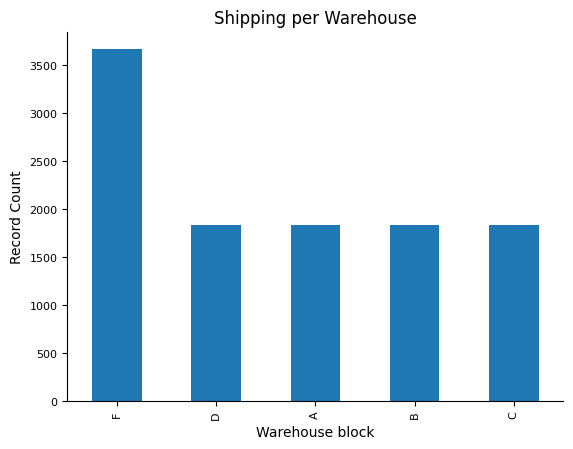

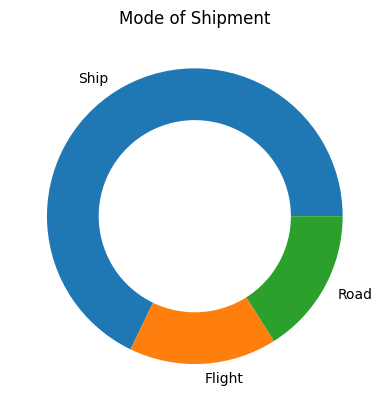

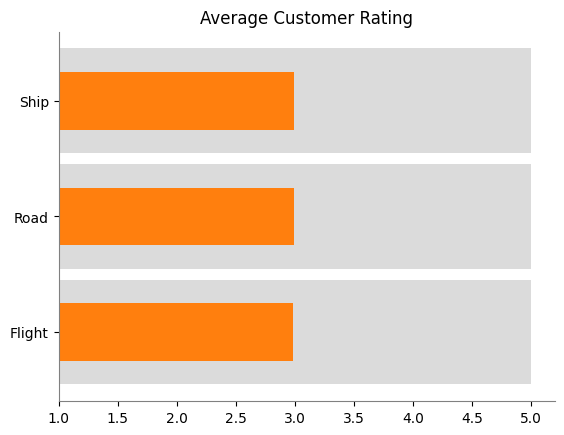

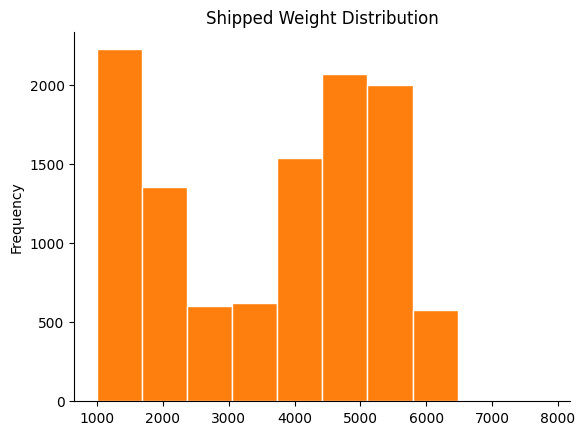

In [7]:
df = load_data()
create_visual_for_shipping_per_werehouse(df)
create_visual_for_mode_of_shipment(df)
create_visual_for_average_Customer_rating(df)
create_visual_for_weight_distribution(df)




In [8]:
%%writefile ../files/input/docs/index.html

<!DOCTYPE html>
<html>
    <body>
        <h1>Shipping Dashboard Example</h1>
        <div style="width:45%;float:left">
            <img src = "shipping_per_warehouse.png" alt= "Fig 1">
            <img src = "mode_of_shipment.png" alt= "Fig 2">
        </div>   
        <div style="width:45%;float:left">
            <img src = "average_customer_rating.png" alt= "Fig 3">
            <img src = "weight_distribution.png" alt= "Fig 4">
        </div>
    </body>
</html>


Writing ../files/input/docs/index.html
